#### Importing Necessary Libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Making it unique and merging into a single csv file

In [3]:
files = [file for file in os.listdir('./files')]
all_data = pd.DataFrame()

for file in files:
    with open("files/"+file, 'r') as temp_f:
        # get No of columns in each line
        col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

        ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
        column_names = [i for i in range(0, max(col_count))]

        ### Read csv
        df = pd.read_csv("files/"+file, delimiter=",", names=column_names)


        # Making the first row as head
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header

        df = df[df['Status'] != 'Awaiting Targets']

        # Making the dataset distinct with respect to Signal_date
        df = df.drop_duplicates(subset = ["Signal_Date"])

        #Concating it to the new dataframe
        all_data = pd.concat([all_data,df])
    
all_data.to_csv("all_data_final.csv",index=False)

In [4]:
data_unique = pd.read_csv("all_data_final.csv")
data_unique = data_unique.drop(data_unique.columns[-1],axis=1)
data_unique.head()

,Date,Close_Price,Signal_Date,Call,Stop_Loss,Target_1,Target_2,Target_3,Target_4,Status
0,2021-01-01,388.10,2020-12-30,384.70,389.77,381.57,379.04,376.50,372.90,Target 1 Reached
1,2021-01-15,438.55,2021-01-14,450.59,466.14,440.97,433.20,425.43,414.36,Target 1 Reached
2,2021-01-20,947.70,2021-01-19,942.55,956.47,933.93,926.97,920.01,910.10,Target 1 Reached
3,2021-01-25,437.25,2021-01-21,448.29,440.09,454.72,459.24,464.37,469.35,Stop Loss has occured
4,2021-01-28,431.90,2021-01-27,444.11,448.43,441.44,439.28,437.12,434.05,Final Target Reached


#### Cleaning up data

In [5]:
nan_df = data_unique[data_unique.isna().any(axis=1)]

# Dropping NaN rows
data_unique = data_unique.dropna(how='any')
data_unique.head()

,Date,Close_Price,Signal_Date,Call,Stop_Loss,Target_1,Target_2,Target_3,Target_4,Status
0,2021-01-01,388.10,2020-12-30,384.70,389.77,381.57,379.04,376.50,372.90,Target 1 Reached
1,2021-01-15,438.55,2021-01-14,450.59,466.14,440.97,433.20,425.43,414.36,Target 1 Reached
2,2021-01-20,947.70,2021-01-19,942.55,956.47,933.93,926.97,920.01,910.10,Target 1 Reached
3,2021-01-25,437.25,2021-01-21,448.29,440.09,454.72,459.24,464.37,469.35,Stop Loss has occured
4,2021-01-28,431.90,2021-01-27,444.11,448.43,441.44,439.28,437.12,434.05,Final Target Reached


#### Count of total calls generated

In [6]:
total_calls = data_unique['Signal_Date'].count()

#### Error in calls

In [7]:
grouped = data_unique.groupby('Status').groups

# Converting grouped data into list
error_calls = len(list(grouped['Stop Loss has occured']))

#### Correct calls count

In [8]:
correct_calls = total_calls - error_calls

#### Accuracy of the alogrothm

In [9]:
correct_calls / total_calls

0.7712765957446809

([<matplotlib.patches.Wedge at 0x7f47f163a4c0>,
 [Text(-0.9172055392071699, 0.6072347147913111, 'Targets'),
  Text(0.9172054823537488, -0.6072348006662885, 'Stop Loss')])

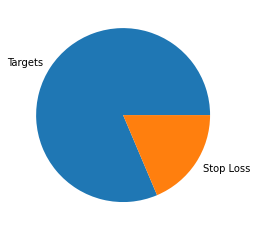

In [10]:
val = [total_calls,error_calls]
lab = ['Targets','Stop Loss']
plt.pie(val,labels=lab)

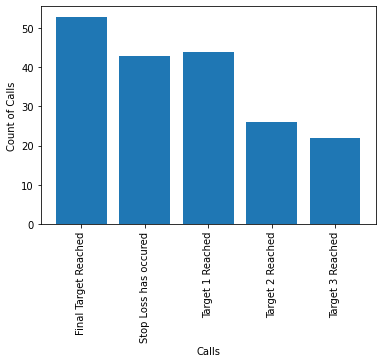

In [11]:
temp = data_unique.groupby('Status')
calls = temp.size()

status = [foo for foo, df in temp]
plt.bar(status,calls)
plt.xticks(status,rotation='vertical')
plt.ylabel('Count of Calls')
plt.xlabel('Calls')
plt.show()